In [2]:
import numpy as np
import os
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing
%matplotlib inline

data1 = pd.read_excel('dataset.xlsx')
data1.head()

,TransactionDate,HouseAge,DistanceFromNearestMetro,NumberOfConvenienceStores,latitude,longitude,NumberOfBedrooms,HouseSize,HousePriceOfUnitArea
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
data1.describe()

,TransactionDate,HouseAge,DistanceFromNearestMetro,NumberOfConvenienceStores,latitude,longitude,NumberOfBedrooms,HouseSize,HousePriceOfUnitArea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

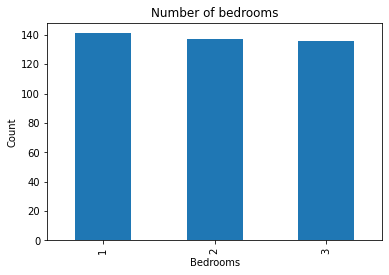

In [4]:
data1['NumberOfBedrooms'].value_counts().plot(kind='bar') 
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<Figure size 720x720 with 0 Axes>

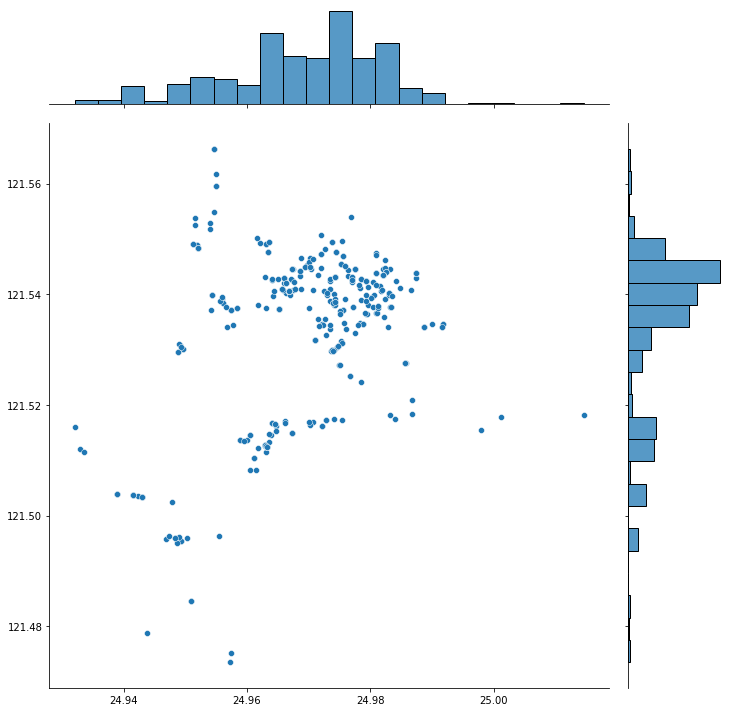

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [5]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data1.latitude.values, y=data1.longitude.values, height=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize =12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Square feet')

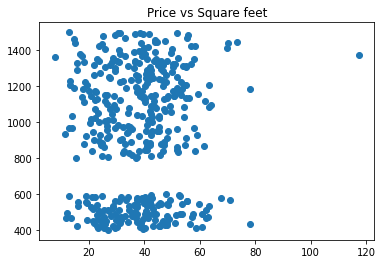

In [6]:
plt.scatter(data1.HousePriceOfUnitArea, data1.HouseSize)
plt.title("Price vs Square feet")

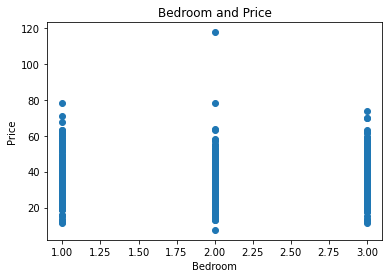

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [7]:
plt.scatter(data1.NumberOfBedrooms, data1.HousePriceOfUnitArea)
plt.title("Bedroom and Price")
plt.xlabel("Bedroom")
plt.ylabel("Price")
plt.show()
sns.despine

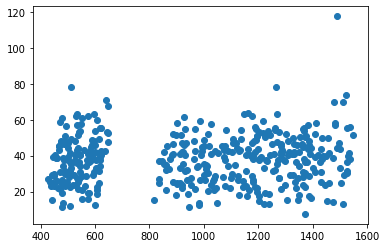

In [8]:
plt.scatter((data1['HouseSize']+data1['HousePriceOfUnitArea']), data1['HousePriceOfUnitArea'])

Text(0.5, 1.0, 'Distance From Nearest Metro vs Price')

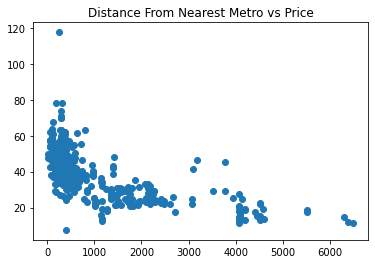

In [9]:
plt.scatter(data1.DistanceFromNearestMetro, data1.HousePriceOfUnitArea)
plt.title('Distance From Nearest Metro vs Price')

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
labels = data1['HousePriceOfUnitArea']

## Stratified Sampling using Scikit-learn's Stratified Shuffle Split Class
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(data1, data1["HousePriceOfUnitArea"]):
    strat_train_set1 = data1.loc[train_index]
    strat_test_set1 = data1.loc[test_index]

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42) 
for train_index, test_index in split.split(data1, data1["HousePriceOfUnitArea"]): 
    strat_train_set1 = data1.loc[train_index] 
    strat_test_set1 = data1.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.